In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import astropy.units as u
import astropy.table as tb
from astropy.coordinates import AltAz, SkyCoord, EarthLocation
from astropy.time import Time

In [3]:
eris_true_FITS = "/Users/riley/Desktop/RAFTS/eris_true.fits"
eris_true = tb.Table.read(eris_true_FITS)
eris_true_exps = np.array(np.unique(eris_true["EXPNUM"]), dtype=int)

eris_true.show_in_notebook()

idx,RA,DEC,XWIN_IMAGE,YWIN_IMAGE,MAG,EXPNUM,CCDNUM,MJD_OBS,BAND,ERRAWIN_WORLD
0,25.65413205351103,-3.40369364645907,591.9478759765625,2819.55908203125,19.07012446181116,233221,20,56547.394167077575,g,1.1026299944205675e-06
1,25.62471712930943,-3.4179971299815404,871.7701416015625,2369.59765625,18.231247130042036,234928,20,56551.32631116093,Y,8.587099728174508e-06
2,25.483054040778136,-3.478566444377312,1998.750732421875,958.8739013671875,19.041695125411145,240777,11,56568.29969905758,g,8.452910265077662e-07
3,25.475024574644998,-3.4816644110749575,1765.834228515625,297.6802062988281,19.048625591842956,241125,20,56569.200296217576,g,7.076520205373527e-07
4,25.27225333467316,-3.5488797101605014,1702.16064453125,1757.9273681640625,19.061330059369364,246881,41,56591.14532113758,g,1.012070015349309e-06
5,24.887509525960837,-3.600089808370126,112.17938995361328,841.9015502929688,18.60667313117216,264536,46,56641.13384800092,Y,3.3572600841580424e-06
6,25.620745472110503,-3.2141408246268037,1595.6358642578125,163.58465576171875,18.51011390465698,364725,29,56932.33411606758,r,5.119150046084542e-07
7,25.620733683362506,-3.2141461477604727,1675.17041015625,3377.41650390625,19.031272287740336,364726,56,56932.33547958758,g,1.1501799690449843e-06
8,25.62072628119369,-3.21415320466121,1591.363525390625,175.46981811523438,18.406556151539682,364727,29,56932.33683486757,i,7.388459835055983e-07
9,25.32673489691202,-3.30772339866268,362.2659606933594,1941.66796875,18.642458804327276,374544,31,56964.241318330925,Y,2.667740091055748e-06


In [4]:
alts = np.zeros(len(eris_true))

for i in range(len(eris_true)):
    alts[i] = SkyCoord(ra=eris_true['RA'][i], dec=eris_true['DEC'][i], unit=u.deg).transform_to(
              AltAz(obstime=Time(eris_true['MJD_OBS'][i], format='mjd'), location=EarthLocation.of_site('Cerro Tololo'))).alt.value

In [5]:
alts

array([46.07945385, 59.07381836, 55.17621621, 61.1814556 , 61.90596162,
       46.62509093, 47.5578178 , 47.19911299, 46.84064101, 48.82188499,
       47.02833065, 49.75509401, 58.31823825, 50.84807751, 45.76802323,
       53.04225369, 57.06806262, 45.63531285, 48.47070691, 48.11636693,
       62.05087555, 61.72384347, 55.80014736, 50.4455033 , 57.7276761 ,
       62.05701057, 61.96290904, 58.56519003, 49.3620203 , 49.01384504,
       58.49997884, 58.27325383, 49.91255447, 50.96189293])

In [6]:
z = 90 - alts
z

array([43.92054615, 30.92618164, 34.82378379, 28.8185444 , 28.09403838,
       43.37490907, 42.4421822 , 42.80088701, 43.15935899, 41.17811501,
       42.97166935, 40.24490599, 31.68176175, 39.15192249, 44.23197677,
       36.95774631, 32.93193738, 44.36468715, 41.52929309, 41.88363307,
       27.94912445, 28.27615653, 34.19985264, 39.5544967 , 32.2723239 ,
       27.94298943, 28.03709096, 31.43480997, 40.6379797 , 40.98615496,
       31.50002116, 31.72674617, 40.08744553, 39.03810707])

In [7]:
X = 1 / np.cos(np.deg2rad(z))
X

array([1.38830578, 1.16573193, 1.21815702, 1.14135615, 1.13356082,
       1.37575144, 1.35508937, 1.36291895, 1.37088835, 1.32860977,
       1.36669745, 1.31011819, 1.17511805, 1.28953296, 1.39563171,
       1.25144055, 1.191445  , 1.39878967, 1.33579681, 1.34317922,
       1.13203603, 1.13549322, 1.20906993, 1.29698451, 1.18270435,
       1.13197173, 1.13296026, 1.17201129, 1.31780127, 1.32473476,
       1.17282796, 1.1756881 , 1.30708272, 1.28745325])

Text(0.5, 0, 'Airmass (X)')

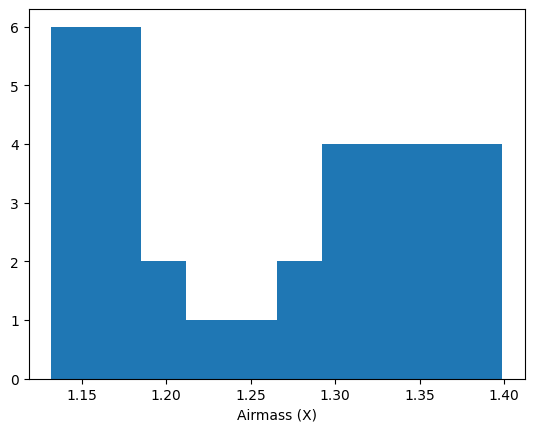

In [8]:
plt.hist(X)
plt.xlabel('Airmass (X)')

Text(0.5, 0, 'Zenith Angle (deg)')

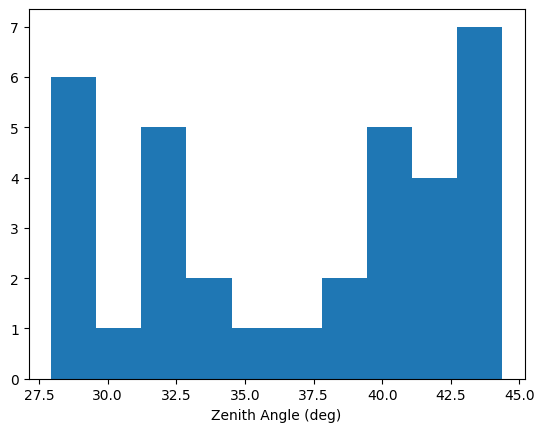

In [9]:
plt.hist(z)
plt.xlabel('Zenith Angle (deg)')

In [10]:
print(X.mean(), X.std())

1.2610864285396028 0.09259696766389455


In [11]:
print(z.min(), z.max())

27.942989431681525 44.36468714610996


In [12]:
np.median(X)

1.2884931033173923